# Utils and Functions

A lot of these functions come from `fastai/fastai`

In [ ]:
#| default_exp utils

In [ ]:
#| export
import math

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np

import torch

## Random stuff

In [ ]:
#| export
def ifnone(x, y):
    if x is None:
        return y
    else:
        return x

very handy for default args on functions

In [ ]:
ifnone(None, 1)

1

In [ ]:
ifnone(1, 3)

1

careful

In [ ]:
ifnone([], 3)

[]

In [ ]:
#| export
def not_none(o):
    if isinstance(o, (list, tuple)):
        return all(not_none(x) for x in o)
    return o is not None

In [ ]:
not_none([1,2,None])

False

In [ ]:
not_none(2)

True

In [ ]:
#| export
def set_seed(s, reproducible=False):
    "Set random seed for `random`, `torch`, and `numpy` (where available) - fastai"
    try: torch.manual_seed(s)
    except NameError: pass
    try: torch.cuda.manual_seed_all(s)
    except NameError: pass
    try: np.random.seed(s%(2**32-1))
    except NameError: pass
    random.seed(s)
    if reproducible:
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [ ]:
#| export
def to_device(t, device):
    if isinstance(t, (tuple, list)):
        return [_t.to(device) for _t in t]
    elif isinstance(t, torch.Tensor):
        return t.to(device)
    else:
        raise("Not a Tensor or list of Tensors")
    return t     

## Image

The Image functions come from `fastai/fastai`

In [ ]:
#| export
def hasattrs(o,attrs):
    "Test whether `o` contains all `attrs`"
    return all(hasattr(o,attr) for attr in attrs)

def _fig_bounds(x):
    r = x//32
    return min(5, max(1,r))

def show_image(im, ax=None, figsize=None, title=None, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    # Handle pytorch axis order
    if hasattrs(im, ('data','cpu','permute')):
        im = im.data.cpu()
        if im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im, np.ndarray): 
        im=np.array(im)
    # Handle 1-channel images
    if im.shape[-1]==1: 
        im=im[...,0]

    if figsize is None: 
        figsize = (_fig_bounds(im.shape[0]), _fig_bounds(im.shape[1]))
    if ax is None: 
        _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: 
        ax.set_title(title)
    ax.axis('off')
    return ax

<AxesSubplot: >

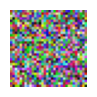

In [ ]:
show_image(torch.rand(3,32,32))

<AxesSubplot: >

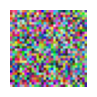

In [ ]:
show_image(np.random.random((32,32,3)))

In [ ]:
#| export
def show_images(ims, nrows=1, ncols=None, titles=None, **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`."
    if ncols is None: 
        ncols = int(math.ceil(len(ims)/nrows))
    if titles is None: 
        titles = [None]*len(ims)
    axs = plt.subplots(nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip(ims, titles, axs): 
        show_image(im, ax=ax, title=t)

In [ ]:
list("abcd")

['a', 'b', 'c', 'd']

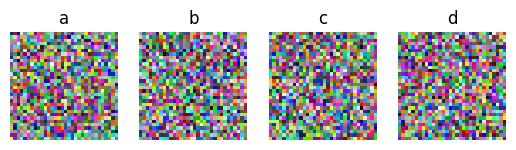

In [ ]:
show_images([torch.rand(3,32,32) for _ in range(4)], titles=list("abcd"))